[View in Colaboratory](https://colab.research.google.com/github/Curiousss/InkerIntern/blob/master/FER_WINO_SEPARABLE_NO_CUDNN.ipynb)

In [8]:
from google.colab import files
uploaded = files.upload()

Saving baddata.txt to baddata.txt


In [1]:
!ls

datalab


In [3]:
!tar xvf fer2013.tar
!ls

fer2013/fer2013.csv
fer2013/README
fer2013/fer2013.bib
fer2013/
datalab  fer2013  fer2013.tar


In [4]:

import csv
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D, InputLayer
from keras.layers import Convolution2D, SeparableConv2D, MaxPooling2D, BatchNormalization 
from keras.layers.advanced_activations import LeakyReLU
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
img_rows, img_cols = 48, 48
batch_size = 128
classes = 7
epoch = 100
img_channels = 1

In [0]:
import csv
f = open('fer2013/fer2013.csv')
csv_f = csv.reader(f)


In [0]:
train_x = []
train_y = []
val_x =[]
val_y =[]

In [0]:
ToBeRemovedTrainingData = []
with open("baddata.txt", "r") as text:
  for line in text:
    ToBeRemovedTrainingData.append(int(line))

In [0]:
num=0
for row in csv_f:
  num = num +1
  if num in ToBeRemovedTrainingData or num==1:
    continue
  #print(row)
  #print(num)
  temp_list = []
  for pixel in row[1].split( ):
    temp_list.append(int(pixel))

  if str(row[2]) == "Training":
    train_y.append(int(row[0]))
    train_x.append(temp_list) 
  elif str(row[2]) == "PublicTest":
    val_y.append(int(row[0]))
    val_x.append(temp_list)

In [0]:
train_x = np.asarray(train_x)
train_y = np.asarray(train_y)
val_x = np.asarray(val_x)
val_y = np.asarray(val_y)

In [0]:
train_x = train_x.reshape(train_x.shape[0], 48, 48)
train_x = train_x.reshape(train_x.shape[0], 48, 48, 1 )
train_y = np_utils.to_categorical(train_y, 7)

In [0]:
val_x = val_x.reshape(val_x.shape[0], 48, 48)
val_x = val_x.reshape(val_x.shape[0], 48, 48, 1)
val_y = np_utils.to_categorical(val_y, 7)

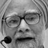

In [14]:
from PIL import Image

#print(train_x.shape)

showimg = train_x[1].reshape(48,48)
img = Image.fromarray(showimg.astype('uint8'))
from IPython.display import display
display(img)

In [0]:
train_x = train_x.astype('float32')
train_x = train_x / 255.0
val_x = val_x.astype('float32')
val_x = val_x / 255.0
train_x = train_x - 0.5
train_x = train_x * 2
val_x = val_x - 0.5
val_x = val_x * 2


In [0]:
input_shape = (img_rows, img_cols, img_channels)
model = Sequential()
model.add(SeparableConv2D(filters=64, kernel_size=(7, 7), padding='same',
                            name='image_array', input_shape=input_shape))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=64, kernel_size=(7, 7), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.3))

model.add(SeparableConv2D(filters=128, kernel_size=(7, 7), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=128, kernel_size=(7, 7), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.3))

model.add(SeparableConv2D(filters=256, kernel_size=(7, 7), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=256, kernel_size=(7, 7), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.3))

model.add(SeparableConv2D(filters=512, kernel_size=(7, 7), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=512, kernel_size=(7, 7), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.3))

#model.add(Flatten())
'''
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(.5))

model.add(Dense(2048))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(.5))
'''
model.add(InputLayer(input_shape=(3, 3, 1024)))
model.add(GlobalAveragePooling2D())
model.add(Dense(7))
model.add(Activation('softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_array (SeparableConv2D (None, 48, 48, 64)        137       
_________________________________________________________________
batch_normalization_27 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
leaky_re_lu_27 (LeakyReLU)   (None, 48, 48, 64)        0         
_________________________________________________________________
separable_conv2d_22 (Separab (None, 48, 48, 64)        4736      
_________________________________________________________________
batch_normalization_28 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
leaky_re_lu_28 (LeakyReLU)   (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 24, 24, 64)        0         
__________

In [0]:
model.compile(optimizer='Adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
filepath='Model.best.hdf5'
checkpointer = keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='auto')


In [18]:
model.load_weights('Model.best.hdf5')

OSError: ignored

In [0]:
# LReLU
import time
start_time = time.time()

model.fit(train_x, train_y, epochs=50, batch_size=batch_size, validation_data=(val_x, val_y), callbacks=[checkpointer])
print("--- %s seconds ---" % (time.time() - start_time))

In [20]:

import time
start_time = time.time()

datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

datagen.fit(train_x)

model.fit_generator(datagen.flow(train_x, train_y,
                    batch_size=batch_size),
                    steps_per_epoch=(train_x.shape[0]/batch_size),
                    epochs=150,
                    validation_data=(val_x, val_y),
                    callbacks=[checkpointer])
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/150
224/223 [==============================] - 101s 453ms/step - loss: 1.7044 - acc: 0.3239 - val_loss: 3.0471 - val_acc: 0.2630

Epoch 00001: val_acc improved from -inf to 0.26304, saving model to Model.best.hdf5
Epoch 2/150
224/223 [==============================] - 97s 434ms/step - loss: 1.5283 - acc: 0.4083 - val_loss: 1.6638 - val_acc: 0.3927

Epoch 00002: val_acc improved from 0.26304 to 0.39275, saving model to Model.best.hdf5
Epoch 3/150
 14/223 [>.............................] - ETA: 1:28 - loss: 1.4641 - acc: 0.4369

224/223 [==============================] - 97s 433ms/step - loss: 1.4375 - acc: 0.4498 - val_loss: 1.4952 - val_acc: 0.4717

Epoch 00003: val_acc improved from 0.39275 to 0.47169, saving model to Model.best.hdf5
Epoch 4/150
224/223 [==============================] - 97s 433ms/step - loss: 1.3623 - acc: 0.4783 - val_loss: 1.5423 - val_acc: 0.4642

Epoch 00004: val_acc did not improve from 0.47169
Epoch 5/150
 28/223 [==>...........................] - ETA: 1:22 - loss: 1.3226 - acc: 0.4986

224/223 [==============================] - 97s 434ms/step - loss: 1.3189 - acc: 0.4972 - val_loss: 1.4529 - val_acc: 0.4934

Epoch 00005: val_acc improved from 0.47169 to 0.49344, saving model to Model.best.hdf5
Epoch 6/150
224/223 [==============================] - 97s 433ms/step - loss: 1.2809 - acc: 0.5102 - val_loss: 1.3091 - val_acc: 0.5105

Epoch 00006: val_acc improved from 0.49344 to 0.51046, saving model to Model.best.hdf5
Epoch 7/150
 28/223 [==>...........................] - ETA: 1:22 - loss: 1.2338 - acc: 0.5335

224/223 [==============================] - 97s 434ms/step - loss: 1.2459 - acc: 0.5253 - val_loss: 1.2865 - val_acc: 0.5300

Epoch 00007: val_acc improved from 0.51046 to 0.52999, saving model to Model.best.hdf5
Epoch 8/150
224/223 [==============================] - 97s 433ms/step - loss: 1.2175 - acc: 0.5344 - val_loss: 1.2594 - val_acc: 0.5294

Epoch 00008: val_acc did not improve from 0.52999
Epoch 9/150
 31/223 [===>..........................] - ETA: 1:21 - loss: 1.1895 - acc: 0.5481

224/223 [==============================] - 97s 433ms/step - loss: 1.1950 - acc: 0.5440 - val_loss: 1.3196 - val_acc: 0.5216

Epoch 00009: val_acc did not improve from 0.52999
Epoch 10/150
224/223 [==============================] - 97s 433ms/step - loss: 1.1739 - acc: 0.5546 - val_loss: 1.1558 - val_acc: 0.5690

Epoch 00010: val_acc improved from 0.52999 to 0.56904, saving model to Model.best.hdf5
Epoch 11/150
 47/223 [=====>........................] - ETA: 1:14 - loss: 1.1592 - acc: 0.5500

224/223 [==============================] - 97s 433ms/step - loss: 1.1568 - acc: 0.5586 - val_loss: 1.1759 - val_acc: 0.5651

Epoch 00011: val_acc did not improve from 0.56904
Epoch 12/150
224/223 [==============================] - 97s 433ms/step - loss: 1.1418 - acc: 0.5635 - val_loss: 1.1396 - val_acc: 0.5766

Epoch 00012: val_acc improved from 0.56904 to 0.57657, saving model to Model.best.hdf5
Epoch 13/150
 50/223 [=====>........................] - ETA: 1:13 - loss: 1.1273 - acc: 0.5722

224/223 [==============================] - 97s 434ms/step - loss: 1.1256 - acc: 0.5721 - val_loss: 1.1668 - val_acc: 0.5668

Epoch 00013: val_acc did not improve from 0.57657
Epoch 14/150
224/223 [==============================] - 97s 433ms/step - loss: 1.1009 - acc: 0.5811 - val_loss: 1.1930 - val_acc: 0.5573

Epoch 00014: val_acc did not improve from 0.57657
Epoch 15/150
 55/223 [======>.......................] - ETA: 1:10 - loss: 1.0854 - acc: 0.5797

224/223 [==============================] - 97s 434ms/step - loss: 1.0980 - acc: 0.5827 - val_loss: 1.1701 - val_acc: 0.5688

Epoch 00015: val_acc did not improve from 0.57657
Epoch 16/150
224/223 [==============================] - 97s 433ms/step - loss: 1.0822 - acc: 0.5914 - val_loss: 1.1484 - val_acc: 0.5835

Epoch 00016: val_acc improved from 0.57657 to 0.58354, saving model to Model.best.hdf5
Epoch 17/150
 51/223 [=====>........................] - ETA: 1:12 - loss: 1.0651 - acc: 0.5945

224/223 [==============================] - 97s 433ms/step - loss: 1.0660 - acc: 0.5960 - val_loss: 1.1198 - val_acc: 0.5891

Epoch 00017: val_acc improved from 0.58354 to 0.58912, saving model to Model.best.hdf5
Epoch 18/150
224/223 [==============================] - 97s 433ms/step - loss: 1.0563 - acc: 0.5991 - val_loss: 1.1212 - val_acc: 0.5941

Epoch 00018: val_acc improved from 0.58912 to 0.59414, saving model to Model.best.hdf5
Epoch 19/150
 31/223 [===>..........................] - ETA: 1:20 - loss: 1.0612 - acc: 0.6028

224/223 [==============================] - 97s 434ms/step - loss: 1.0430 - acc: 0.6069 - val_loss: 1.1609 - val_acc: 0.5838

Epoch 00019: val_acc did not improve from 0.59414
Epoch 20/150
224/223 [==============================] - 97s 433ms/step - loss: 1.0289 - acc: 0.6129 - val_loss: 1.1641 - val_acc: 0.5799

Epoch 00020: val_acc did not improve from 0.59414
Epoch 21/150
 51/223 [=====>........................] - ETA: 1:12 - loss: 1.0183 - acc: 0.6092

224/223 [==============================] - 97s 433ms/step - loss: 1.0268 - acc: 0.6136 - val_loss: 1.1091 - val_acc: 0.6028

Epoch 00021: val_acc improved from 0.59414 to 0.60279, saving model to Model.best.hdf5
Epoch 22/150
224/223 [==============================] - 97s 434ms/step - loss: 1.0173 - acc: 0.6191 - val_loss: 1.1176 - val_acc: 0.5919

Epoch 00022: val_acc did not improve from 0.60279
Epoch 23/150
 34/223 [===>..........................] - ETA: 1:19 - loss: 0.9601 - acc: 0.6406

224/223 [==============================] - 97s 433ms/step - loss: 0.9999 - acc: 0.6234 - val_loss: 1.1063 - val_acc: 0.5992

Epoch 00023: val_acc did not improve from 0.60279
Epoch 24/150
224/223 [==============================] - 97s 433ms/step - loss: 0.9901 - acc: 0.6263 - val_loss: 1.1213 - val_acc: 0.5933

Epoch 00024: val_acc did not improve from 0.60279
Epoch 25/150
 52/223 [=====>........................] - ETA: 1:11 - loss: 0.9564 - acc: 0.6422

224/223 [==============================] - 97s 434ms/step - loss: 0.9819 - acc: 0.6326 - val_loss: 1.0727 - val_acc: 0.6081

Epoch 00025: val_acc improved from 0.60279 to 0.60809, saving model to Model.best.hdf5
Epoch 26/150
224/223 [==============================] - 97s 433ms/step - loss: 0.9745 - acc: 0.6334 - val_loss: 1.0705 - val_acc: 0.6123

Epoch 00026: val_acc improved from 0.60809 to 0.61227, saving model to Model.best.hdf5
Epoch 27/150
 32/223 [===>..........................] - ETA: 1:20 - loss: 0.9476 - acc: 0.6462

224/223 [==============================] - 97s 433ms/step - loss: 0.9597 - acc: 0.6397 - val_loss: 1.1235 - val_acc: 0.5964

Epoch 00027: val_acc did not improve from 0.61227
Epoch 28/150
224/223 [==============================] - 97s 433ms/step - loss: 0.9450 - acc: 0.6417 - val_loss: 1.0796 - val_acc: 0.6045

Epoch 00028: val_acc did not improve from 0.61227
Epoch 29/150
 52/223 [=====>........................] - ETA: 1:12 - loss: 0.8962 - acc: 0.6575

224/223 [==============================] - 97s 434ms/step - loss: 0.9433 - acc: 0.6447 - val_loss: 1.0828 - val_acc: 0.6084

Epoch 00029: val_acc did not improve from 0.61227
Epoch 30/150
224/223 [==============================] - 97s 433ms/step - loss: 0.9361 - acc: 0.6500 - val_loss: 1.1177 - val_acc: 0.6064

Epoch 00030: val_acc did not improve from 0.61227
Epoch 31/150
 55/223 [======>.......................] - ETA: 1:10 - loss: 0.9211 - acc: 0.6503

224/223 [==============================] - 97s 433ms/step - loss: 0.9285 - acc: 0.6533 - val_loss: 1.1231 - val_acc: 0.6148

Epoch 00031: val_acc improved from 0.61227 to 0.61478, saving model to Model.best.hdf5
Epoch 32/150
224/223 [==============================] - 97s 434ms/step - loss: 0.9157 - acc: 0.6569 - val_loss: 1.0536 - val_acc: 0.6237

Epoch 00032: val_acc improved from 0.61478 to 0.62371, saving model to Model.best.hdf5
Epoch 33/150
 32/223 [===>..........................] - ETA: 1:20 - loss: 0.8796 - acc: 0.6626

224/223 [==============================] - 97s 433ms/step - loss: 0.9111 - acc: 0.6566 - val_loss: 1.0391 - val_acc: 0.6351

Epoch 00033: val_acc improved from 0.62371 to 0.63515, saving model to Model.best.hdf5
Epoch 34/150
224/223 [==============================] - 97s 433ms/step - loss: 0.9000 - acc: 0.6607 - val_loss: 1.0769 - val_acc: 0.6279

Epoch 00034: val_acc did not improve from 0.63515
Epoch 35/150
 31/223 [===>..........................] - ETA: 1:20 - loss: 0.8359 - acc: 0.6903

224/223 [==============================] - 97s 434ms/step - loss: 0.8856 - acc: 0.6718 - val_loss: 1.0248 - val_acc: 0.6237

Epoch 00035: val_acc did not improve from 0.63515
Epoch 36/150
224/223 [==============================] - 97s 433ms/step - loss: 0.8776 - acc: 0.6734 - val_loss: 1.0656 - val_acc: 0.6332

Epoch 00036: val_acc did not improve from 0.63515
Epoch 37/150
 51/223 [=====>........................] - ETA: 1:12 - loss: 0.8510 - acc: 0.6828

224/223 [==============================] - 97s 433ms/step - loss: 0.8752 - acc: 0.6730 - val_loss: 1.2167 - val_acc: 0.5958

Epoch 00037: val_acc did not improve from 0.63515
Epoch 38/150
224/223 [==============================] - 97s 434ms/step - loss: 0.8652 - acc: 0.6772 - val_loss: 1.0447 - val_acc: 0.6257

Epoch 00038: val_acc did not improve from 0.63515
Epoch 39/150
 55/223 [======>.......................] - ETA: 1:10 - loss: 0.8273 - acc: 0.6950

224/223 [==============================] - 97s 433ms/step - loss: 0.8513 - acc: 0.6826 - val_loss: 1.0505 - val_acc: 0.6310

Epoch 00039: val_acc did not improve from 0.63515
Epoch 40/150
224/223 [==============================] - 97s 434ms/step - loss: 0.8567 - acc: 0.6800 - val_loss: 1.0786 - val_acc: 0.6301

Epoch 00040: val_acc did not improve from 0.63515
Epoch 41/150
 56/223 [======>.......................] - ETA: 1:10 - loss: 0.8397 - acc: 0.6861

224/223 [==============================] - 97s 433ms/step - loss: 0.8445 - acc: 0.6865 - val_loss: 1.1278 - val_acc: 0.6273

Epoch 00041: val_acc did not improve from 0.63515
Epoch 42/150
224/223 [==============================] - 97s 433ms/step - loss: 0.8359 - acc: 0.6904 - val_loss: 1.0880 - val_acc: 0.6234

Epoch 00042: val_acc did not improve from 0.63515
Epoch 43/150
 56/223 [======>.......................] - ETA: 1:10 - loss: 0.8129 - acc: 0.6985

224/223 [==============================] - 97s 433ms/step - loss: 0.8261 - acc: 0.6927 - val_loss: 1.0326 - val_acc: 0.6393

Epoch 00043: val_acc improved from 0.63515 to 0.63933, saving model to Model.best.hdf5
Epoch 44/150
224/223 [==============================] - 97s 433ms/step - loss: 0.8126 - acc: 0.7001 - val_loss: 1.0839 - val_acc: 0.6343

Epoch 00044: val_acc did not improve from 0.63933
Epoch 45/150
 35/223 [===>..........................] - ETA: 1:17 - loss: 0.8110 - acc: 0.7008

224/223 [==============================] - 97s 434ms/step - loss: 0.8096 - acc: 0.7012 - val_loss: 1.0724 - val_acc: 0.6363

Epoch 00045: val_acc did not improve from 0.63933
Epoch 46/150
224/223 [==============================] - 97s 433ms/step - loss: 0.8044 - acc: 0.6991 - val_loss: 1.0573 - val_acc: 0.6424

Epoch 00046: val_acc improved from 0.63933 to 0.64240, saving model to Model.best.hdf5
Epoch 47/150
 48/223 [=====>........................] - ETA: 1:13 - loss: 0.7739 - acc: 0.7142

224/223 [==============================] - 97s 433ms/step - loss: 0.7967 - acc: 0.7027 - val_loss: 1.0671 - val_acc: 0.6363

Epoch 00047: val_acc did not improve from 0.64240
Epoch 48/150
224/223 [==============================] - 97s 434ms/step - loss: 0.7874 - acc: 0.7069 - val_loss: 1.0598 - val_acc: 0.6382

Epoch 00048: val_acc did not improve from 0.64240
Epoch 49/150
 54/223 [======>.......................] - ETA: 1:11 - loss: 0.7807 - acc: 0.7079

224/223 [==============================] - 97s 433ms/step - loss: 0.7791 - acc: 0.7062 - val_loss: 1.0654 - val_acc: 0.6365

Epoch 00049: val_acc did not improve from 0.64240
Epoch 50/150
224/223 [==============================] - 97s 433ms/step - loss: 0.7809 - acc: 0.7122 - val_loss: 1.0528 - val_acc: 0.6474

Epoch 00050: val_acc improved from 0.64240 to 0.64742, saving model to Model.best.hdf5
Epoch 51/150
 51/223 [=====>........................] - ETA: 1:12 - loss: 0.7413 - acc: 0.7253

224/223 [==============================] - 97s 433ms/step - loss: 0.7675 - acc: 0.7160 - val_loss: 1.0747 - val_acc: 0.6399

Epoch 00051: val_acc did not improve from 0.64742
Epoch 52/150
224/223 [==============================] - 97s 433ms/step - loss: 0.7566 - acc: 0.7218 - val_loss: 1.0451 - val_acc: 0.6410

Epoch 00052: val_acc did not improve from 0.64742
Epoch 53/150
 55/223 [======>.......................] - ETA: 1:10 - loss: 0.7224 - acc: 0.7250

224/223 [==============================] - 97s 434ms/step - loss: 0.7531 - acc: 0.7187 - val_loss: 1.0430 - val_acc: 0.6488

Epoch 00053: val_acc improved from 0.64742 to 0.64881, saving model to Model.best.hdf5
Epoch 54/150
224/223 [==============================] - 97s 433ms/step - loss: 0.7414 - acc: 0.7243 - val_loss: 1.1460 - val_acc: 0.6257

Epoch 00054: val_acc did not improve from 0.64881
Epoch 55/150
 35/223 [===>..........................] - ETA: 1:19 - loss: 0.7237 - acc: 0.7292

224/223 [==============================] - 97s 433ms/step - loss: 0.7444 - acc: 0.7224 - val_loss: 1.0851 - val_acc: 0.6382

Epoch 00055: val_acc did not improve from 0.64881
Epoch 56/150
224/223 [==============================] - 97s 433ms/step - loss: 0.7387 - acc: 0.7255 - val_loss: 1.1013 - val_acc: 0.6404

Epoch 00056: val_acc did not improve from 0.64881
Epoch 57/150
 52/223 [=====>........................] - ETA: 1:12 - loss: 0.7055 - acc: 0.7408

224/223 [==============================] - 97s 433ms/step - loss: 0.7281 - acc: 0.7301 - val_loss: 1.1183 - val_acc: 0.6259

Epoch 00057: val_acc did not improve from 0.64881
Epoch 58/150
224/223 [==============================] - 97s 434ms/step - loss: 0.7234 - acc: 0.7323 - val_loss: 1.0582 - val_acc: 0.6519

Epoch 00058: val_acc improved from 0.64881 to 0.65188, saving model to Model.best.hdf5
Epoch 59/150
 51/223 [=====>........................] - ETA: 1:11 - loss: 0.6826 - acc: 0.7517

224/223 [==============================] - 97s 433ms/step - loss: 0.7127 - acc: 0.7388 - val_loss: 1.1074 - val_acc: 0.6391

Epoch 00059: val_acc did not improve from 0.65188
Epoch 60/150
224/223 [==============================] - 97s 433ms/step - loss: 0.7147 - acc: 0.7333 - val_loss: 1.0866 - val_acc: 0.6374

Epoch 00060: val_acc did not improve from 0.65188
Epoch 61/150
 55/223 [======>.......................] - ETA: 1:10 - loss: 0.6607 - acc: 0.7582

224/223 [==============================] - 97s 433ms/step - loss: 0.6992 - acc: 0.7431 - val_loss: 1.0934 - val_acc: 0.6519

Epoch 00061: val_acc did not improve from 0.65188
Epoch 62/150
224/223 [==============================] - 97s 433ms/step - loss: 0.6939 - acc: 0.7425 - val_loss: 1.1277 - val_acc: 0.6268

Epoch 00062: val_acc did not improve from 0.65188
Epoch 63/150
 56/223 [======>.......................] - ETA: 1:10 - loss: 0.6721 - acc: 0.7528

224/223 [==============================] - 97s 433ms/step - loss: 0.6935 - acc: 0.7440 - val_loss: 1.0830 - val_acc: 0.6563

Epoch 00063: val_acc improved from 0.65188 to 0.65635, saving model to Model.best.hdf5
Epoch 64/150
224/223 [==============================] - 97s 433ms/step - loss: 0.6882 - acc: 0.7476 - val_loss: 1.1098 - val_acc: 0.6438

Epoch 00064: val_acc did not improve from 0.65635
Epoch 65/150
 35/223 [===>..........................] - ETA: 1:19 - loss: 0.6728 - acc: 0.7507

224/223 [==============================] - 97s 433ms/step - loss: 0.6738 - acc: 0.7492 - val_loss: 1.1160 - val_acc: 0.6444

Epoch 00065: val_acc did not improve from 0.65635
Epoch 66/150
224/223 [==============================] - 97s 434ms/step - loss: 0.6793 - acc: 0.7507 - val_loss: 1.1155 - val_acc: 0.6374

Epoch 00066: val_acc did not improve from 0.65635
Epoch 67/150
 52/223 [=====>........................] - ETA: 1:12 - loss: 0.6470 - acc: 0.7611

224/223 [==============================] - 97s 433ms/step - loss: 0.6664 - acc: 0.7540 - val_loss: 1.0919 - val_acc: 0.6435

Epoch 00067: val_acc did not improve from 0.65635
Epoch 68/150
224/223 [==============================] - 97s 434ms/step - loss: 0.6684 - acc: 0.7555 - val_loss: 1.1153 - val_acc: 0.6421

Epoch 00068: val_acc did not improve from 0.65635
Epoch 69/150
 55/223 [======>.......................] - ETA: 1:10 - loss: 0.6377 - acc: 0.7648

224/223 [==============================] - 97s 433ms/step - loss: 0.6563 - acc: 0.7575 - val_loss: 1.1080 - val_acc: 0.6552

Epoch 00069: val_acc did not improve from 0.65635
Epoch 70/150
224/223 [==============================] - 97s 433ms/step - loss: 0.6604 - acc: 0.7556 - val_loss: 1.1621 - val_acc: 0.6282

Epoch 00070: val_acc did not improve from 0.65635
Epoch 71/150
 56/223 [======>.......................] - ETA: 1:10 - loss: 0.6280 - acc: 0.7683

224/223 [==============================] - 97s 433ms/step - loss: 0.6545 - acc: 0.7585 - val_loss: 1.1653 - val_acc: 0.6245

Epoch 00071: val_acc did not improve from 0.65635
Epoch 72/150
224/223 [==============================] - 97s 433ms/step - loss: 0.6438 - acc: 0.7629 - val_loss: 1.1192 - val_acc: 0.6449

Epoch 00072: val_acc did not improve from 0.65635
Epoch 73/150
 56/223 [======>.......................] - ETA: 1:10 - loss: 0.6095 - acc: 0.7741

224/223 [==============================] - 97s 434ms/step - loss: 0.6396 - acc: 0.7644 - val_loss: 1.0807 - val_acc: 0.6449

Epoch 00073: val_acc did not improve from 0.65635
Epoch 74/150
224/223 [==============================] - 97s 433ms/step - loss: 0.6311 - acc: 0.7700 - val_loss: 1.1574 - val_acc: 0.6399

Epoch 00074: val_acc did not improve from 0.65635
Epoch 75/150
 56/223 [======>.......................] - ETA: 1:09 - loss: 0.6077 - acc: 0.7768

224/223 [==============================] - 97s 433ms/step - loss: 0.6194 - acc: 0.7709 - val_loss: 1.1302 - val_acc: 0.6505

Epoch 00075: val_acc did not improve from 0.65635
Epoch 76/150
224/223 [==============================] - 97s 435ms/step - loss: 0.6205 - acc: 0.7693 - val_loss: 1.1807 - val_acc: 0.6374

Epoch 00076: val_acc did not improve from 0.65635
Epoch 77/150
 56/223 [======>.......................] - ETA: 1:09 - loss: 0.6117 - acc: 0.7727

224/223 [==============================] - 97s 433ms/step - loss: 0.6191 - acc: 0.7710 - val_loss: 1.1086 - val_acc: 0.6555

Epoch 00077: val_acc did not improve from 0.65635
Epoch 78/150
224/223 [==============================] - 97s 433ms/step - loss: 0.6149 - acc: 0.7737 - val_loss: 1.1275 - val_acc: 0.6491

Epoch 00078: val_acc did not improve from 0.65635
Epoch 79/150
 56/223 [======>.......................] - ETA: 1:10 - loss: 0.5761 - acc: 0.7857

224/223 [==============================] - 97s 433ms/step - loss: 0.6089 - acc: 0.7739 - val_loss: 1.1165 - val_acc: 0.6552

Epoch 00079: val_acc did not improve from 0.65635
Epoch 80/150
224/223 [==============================] - 97s 433ms/step - loss: 0.6023 - acc: 0.7787 - val_loss: 1.1182 - val_acc: 0.6533

Epoch 00080: val_acc did not improve from 0.65635
Epoch 81/150
 56/223 [======>.......................] - ETA: 1:09 - loss: 0.5724 - acc: 0.7919

224/223 [==============================] - 97s 433ms/step - loss: 0.5985 - acc: 0.7791 - val_loss: 1.1229 - val_acc: 0.6505

Epoch 00081: val_acc did not improve from 0.65635
Epoch 82/150
224/223 [==============================] - 97s 433ms/step - loss: 0.5936 - acc: 0.7825 - val_loss: 1.1926 - val_acc: 0.6474

Epoch 00082: val_acc did not improve from 0.65635
Epoch 83/150
 56/223 [======>.......................] - ETA: 1:10 - loss: 0.5658 - acc: 0.7960

224/223 [==============================] - 97s 434ms/step - loss: 0.5874 - acc: 0.7840 - val_loss: 1.2097 - val_acc: 0.6374

Epoch 00083: val_acc did not improve from 0.65635
Epoch 84/150
224/223 [==============================] - 97s 434ms/step - loss: 0.5905 - acc: 0.7808 - val_loss: 1.1377 - val_acc: 0.6527

Epoch 00084: val_acc did not improve from 0.65635
Epoch 85/150
 56/223 [======>.......................] - ETA: 1:10 - loss: 0.5672 - acc: 0.7955

224/223 [==============================] - 97s 434ms/step - loss: 0.5816 - acc: 0.7873 - val_loss: 1.1802 - val_acc: 0.6416

Epoch 00085: val_acc did not improve from 0.65635
Epoch 86/150
224/223 [==============================] - 97s 434ms/step - loss: 0.5769 - acc: 0.7882 - val_loss: 1.2120 - val_acc: 0.6427

Epoch 00086: val_acc did not improve from 0.65635
Epoch 87/150
 56/223 [======>.......................] - ETA: 1:10 - loss: 0.5569 - acc: 0.7962

224/223 [==============================] - 97s 433ms/step - loss: 0.5706 - acc: 0.7909 - val_loss: 1.1822 - val_acc: 0.6410

Epoch 00087: val_acc did not improve from 0.65635
Epoch 88/150
224/223 [==============================] - 97s 433ms/step - loss: 0.5698 - acc: 0.7903 - val_loss: 1.2227 - val_acc: 0.6357

Epoch 00088: val_acc did not improve from 0.65635
Epoch 89/150
 56/223 [======>.......................] - ETA: 1:09 - loss: 0.5497 - acc: 0.7995

224/223 [==============================] - 97s 432ms/step - loss: 0.5681 - acc: 0.7925 - val_loss: 1.1880 - val_acc: 0.6477

Epoch 00089: val_acc did not improve from 0.65635
Epoch 90/150
224/223 [==============================] - 97s 433ms/step - loss: 0.5597 - acc: 0.7921 - val_loss: 1.1521 - val_acc: 0.6469

Epoch 00090: val_acc did not improve from 0.65635
Epoch 91/150
 56/223 [======>.......................] - ETA: 1:10 - loss: 0.5413 - acc: 0.8012

224/223 [==============================] - 97s 433ms/step - loss: 0.5527 - acc: 0.7957 - val_loss: 1.1886 - val_acc: 0.6483

Epoch 00091: val_acc did not improve from 0.65635
Epoch 92/150
224/223 [==============================] - 97s 434ms/step - loss: 0.5587 - acc: 0.7938 - val_loss: 1.1519 - val_acc: 0.6550

Epoch 00092: val_acc did not improve from 0.65635
Epoch 93/150
 56/223 [======>.......................] - ETA: 1:10 - loss: 0.5223 - acc: 0.8103

224/223 [==============================] - 97s 433ms/step - loss: 0.5459 - acc: 0.8010 - val_loss: 1.1978 - val_acc: 0.6407

Epoch 00093: val_acc did not improve from 0.65635
Epoch 94/150
224/223 [==============================] - 97s 433ms/step - loss: 0.5545 - acc: 0.7935 - val_loss: 1.2554 - val_acc: 0.6298

Epoch 00094: val_acc did not improve from 0.65635
Epoch 95/150
 56/223 [======>.......................] - ETA: 1:09 - loss: 0.5101 - acc: 0.8074

224/223 [==============================] - 97s 434ms/step - loss: 0.5387 - acc: 0.8014 - val_loss: 1.1957 - val_acc: 0.6463

Epoch 00095: val_acc did not improve from 0.65635
Epoch 96/150
224/223 [==============================] - 97s 434ms/step - loss: 0.5339 - acc: 0.8051 - val_loss: 1.2470 - val_acc: 0.6416

Epoch 00096: val_acc did not improve from 0.65635
Epoch 97/150
 56/223 [======>.......................] - ETA: 1:09 - loss: 0.5135 - acc: 0.8170

224/223 [==============================] - 97s 433ms/step - loss: 0.5342 - acc: 0.8070 - val_loss: 1.1967 - val_acc: 0.6586

Epoch 00097: val_acc improved from 0.65635 to 0.65858, saving model to Model.best.hdf5
Epoch 98/150
224/223 [==============================] - 97s 433ms/step - loss: 0.5357 - acc: 0.8032 - val_loss: 1.1917 - val_acc: 0.6594

Epoch 00098: val_acc improved from 0.65858 to 0.65941, saving model to Model.best.hdf5
Epoch 99/150
 32/223 [===>..........................] - ETA: 1:20 - loss: 0.5077 - acc: 0.8137

224/223 [==============================] - 97s 433ms/step - loss: 0.5263 - acc: 0.8079 - val_loss: 1.2191 - val_acc: 0.6639

Epoch 00099: val_acc improved from 0.65941 to 0.66388, saving model to Model.best.hdf5
Epoch 100/150
224/223 [==============================] - 97s 433ms/step - loss: 0.5244 - acc: 0.8073 - val_loss: 1.2022 - val_acc: 0.6508

Epoch 00100: val_acc did not improve from 0.66388
Epoch 101/150
 30/223 [===>..........................] - ETA: 1:20 - loss: 0.5125 - acc: 0.8161

224/223 [==============================] - 97s 433ms/step - loss: 0.5150 - acc: 0.8120 - val_loss: 1.2209 - val_acc: 0.6460

Epoch 00101: val_acc did not improve from 0.66388
Epoch 102/150
224/223 [==============================] - 97s 434ms/step - loss: 0.5188 - acc: 0.8091 - val_loss: 1.1859 - val_acc: 0.6605

Epoch 00102: val_acc did not improve from 0.66388
Epoch 103/150
 50/223 [=====>........................] - ETA: 1:12 - loss: 0.4816 - acc: 0.8269

224/223 [==============================] - 97s 433ms/step - loss: 0.5152 - acc: 0.8107 - val_loss: 1.2296 - val_acc: 0.6566

Epoch 00103: val_acc did not improve from 0.66388
Epoch 104/150
224/223 [==============================] - 97s 433ms/step - loss: 0.5229 - acc: 0.8095 - val_loss: 1.2186 - val_acc: 0.6541

Epoch 00104: val_acc did not improve from 0.66388
Epoch 105/150
 54/223 [======>.......................] - ETA: 1:11 - loss: 0.4736 - acc: 0.8267

224/223 [==============================] - 97s 433ms/step - loss: 0.5010 - acc: 0.8176 - val_loss: 1.2162 - val_acc: 0.6591

Epoch 00105: val_acc did not improve from 0.66388
Epoch 106/150
224/223 [==============================] - 97s 433ms/step - loss: 0.5046 - acc: 0.8129 - val_loss: 1.2241 - val_acc: 0.6594

Epoch 00106: val_acc did not improve from 0.66388
Epoch 107/150
 55/223 [======>.......................] - ETA: 1:11 - loss: 0.4678 - acc: 0.8291

224/223 [==============================] - 97s 433ms/step - loss: 0.5017 - acc: 0.8160 - val_loss: 1.2421 - val_acc: 0.6603

Epoch 00107: val_acc did not improve from 0.66388
Epoch 108/150
224/223 [==============================] - 97s 433ms/step - loss: 0.4852 - acc: 0.8233 - val_loss: 1.3107 - val_acc: 0.6477

Epoch 00108: val_acc did not improve from 0.66388
Epoch 109/150
 55/223 [======>.......................] - ETA: 1:10 - loss: 0.4624 - acc: 0.8324

224/223 [==============================] - 97s 433ms/step - loss: 0.4952 - acc: 0.8195 - val_loss: 1.2292 - val_acc: 0.6591

Epoch 00109: val_acc did not improve from 0.66388
Epoch 110/150
224/223 [==============================] - 97s 434ms/step - loss: 0.4894 - acc: 0.8186 - val_loss: 1.2539 - val_acc: 0.6580

Epoch 00110: val_acc did not improve from 0.66388
Epoch 111/150
 55/223 [======>.......................] - ETA: 1:10 - loss: 0.4944 - acc: 0.8213

224/223 [==============================] - 97s 433ms/step - loss: 0.4945 - acc: 0.8195 - val_loss: 1.2570 - val_acc: 0.6597

Epoch 00111: val_acc did not improve from 0.66388
Epoch 112/150
224/223 [==============================] - 97s 433ms/step - loss: 0.4877 - acc: 0.8224 - val_loss: 1.2153 - val_acc: 0.6616

Epoch 00112: val_acc did not improve from 0.66388
Epoch 113/150
 55/223 [======>.......................] - ETA: 1:10 - loss: 0.4586 - acc: 0.8266

224/223 [==============================] - 97s 433ms/step - loss: 0.4795 - acc: 0.8226 - val_loss: 1.2404 - val_acc: 0.6600

Epoch 00113: val_acc did not improve from 0.66388
Epoch 114/150
224/223 [==============================] - 97s 432ms/step - loss: 0.4711 - acc: 0.8291 - val_loss: 1.2554 - val_acc: 0.6611

Epoch 00114: val_acc did not improve from 0.66388
Epoch 115/150
 55/223 [======>.......................] - ETA: 1:10 - loss: 0.4584 - acc: 0.8283

224/223 [==============================] - 97s 433ms/step - loss: 0.4789 - acc: 0.8259 - val_loss: 1.2726 - val_acc: 0.6510

Epoch 00115: val_acc did not improve from 0.66388
Epoch 116/150
 98/223 [============>.................] - ETA: 52s - loss: 0.4623 - acc: 0.8309

KeyboardInterrupt: ignored

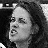

In [0]:
celebanger = Image.open("celeb_fer1.jpg")

celebanger = celebanger.convert('L')
celebanger = celebanger.resize((48,48))
from IPython.display import display
display(celebanger)

In [0]:
celeb_img_np=np.asarray(celebanger)#.getdata()).reshape(48, 48, 1)
celeb_img_np = celeb_img_np.reshape(48, 48, 1)
print(celeb_img_np.shape)
celeb_img_np = celeb_img_np / 255.0
celeb_img_np = celeb_img_np - 0.5
celeb_img_np = celeb_img_np * 2

(48, 48, 1)


In [0]:
print(celeb_img_np.shape)
y = model.predict(celeb_img_np)
print(y)

(48, 48, 1)


ValueError: ignored